### Student Information
Name:

Student ID:

GitHub ID:

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

2 data prepare:
      type             datetime  post_id         subreddit                                                                                                                                   title                author                                                                                                          url  upvotes  downvotes  upvote_ratio                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

<Axes: xlabel='date_only', ylabel='subreddit'>

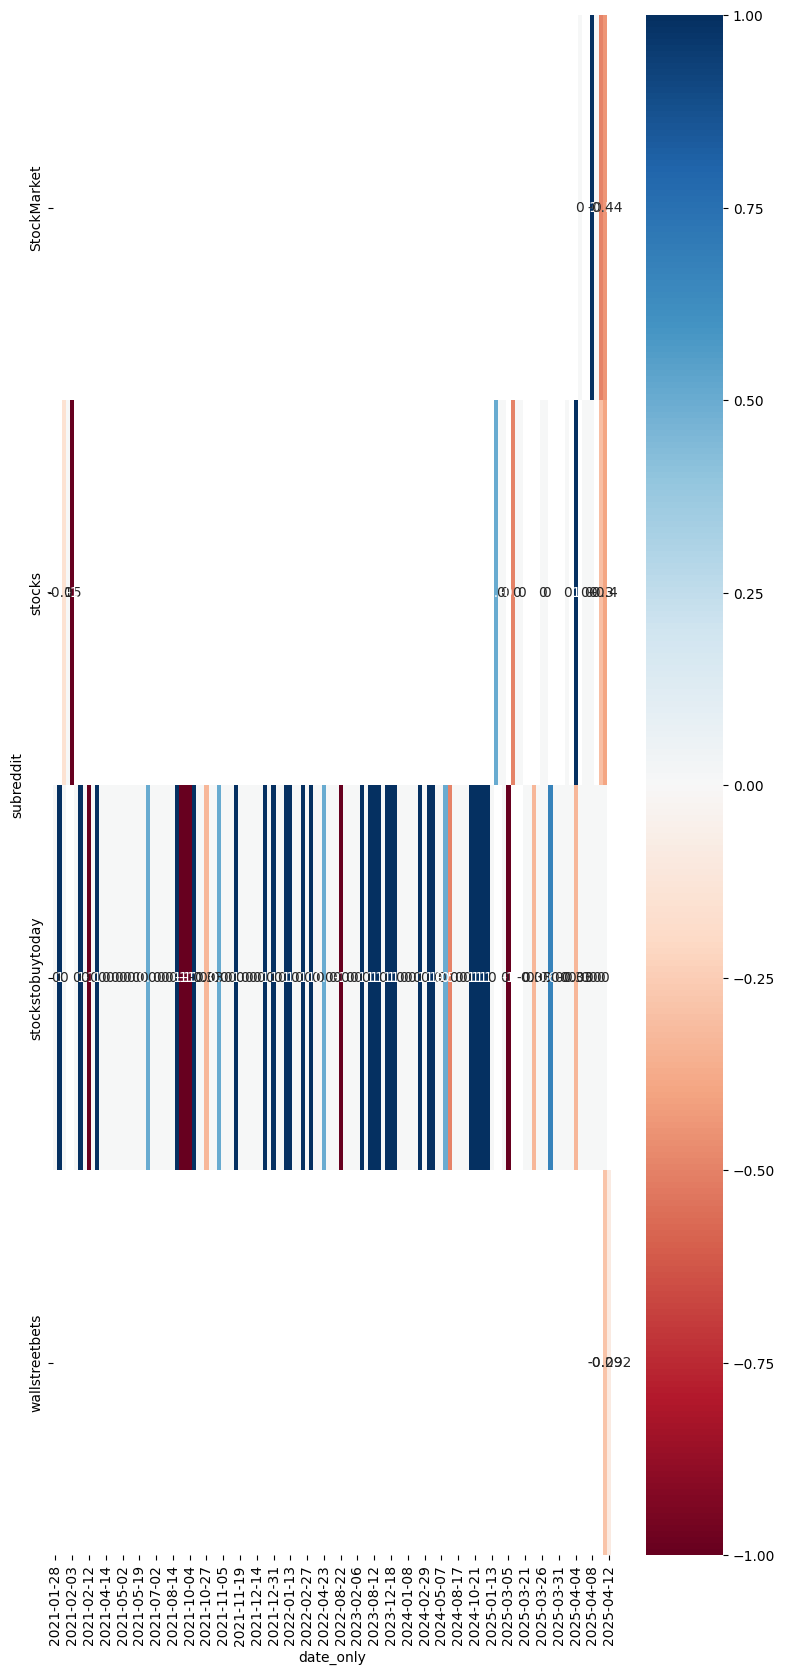

In [60]:
import pandas as pd
import numpy as np
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import helpers.data_mining_helpers as dmh
import math
import PAMI
import umap
import sys
from IPython.display import clear_output
from sklearn.feature_extraction.text import CountVectorizer
import time
import seaborn as sns
import matplotlib.pyplot as plts

def b():
    print("-------------------------------------------------------------------------------------------")
def c():
    print('\n')
def e():
    clear_output(wait=True)
    input("按下 Enter 繼續...")

#environment setup start
print("environment setup:")
%load_ext autoreload
%autoreload 2
nltk.download('punkt') 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) 
pd.set_option("display.max_colwidth", None)
pd.set_option("display.expand_frame_repr", False)
c()
#environment setup end
# 1 the data start
print("1 the data:")
a= pd.read_csv("newdataset/Reddit-stock-sentiment.csv")
print("complicated")
print(a.index)

c()
clear_output(wait=True)
input("按下 Enter 繼續...")
# 1 the data end
# 2 data prepare start
print("2 data prepare:")
print(a.iloc[:4])
'''
b()
print("text 欄的長度:",len(a.text))
print("type 欄的長度:",len(a.type))
b()
for i in range(3):
    print(f"example {i+1}")
    print("\n".join(a.text[i].split("\n")))
c()
e()
# 2 data prepare end
# 3 data transformation start
print("3 data transformation:")
print(f"本資料已為dataframe格式:{type(a)}")
b()
    # ee= ['wallstreetbets', 'StockMarket', 'stockstobuytoday', 'stocks'] f=pd.DataFrame({"target_names":ee})
a["subreddit_id"]=pd.factorize(a["subreddit"])[0]
print(a[:10][["subreddit","subreddit_id"]])
c()
qq=int(input(f"only in {min(a['subreddit_id'])} to {max(a['subreddit_id'])}:")) #記得在f string 裡用[]存取dataframe要用單引號
if(qq>=min(a['subreddit_id']) and qq<=max(a['subreddit_id'])):
     print(a.query('subreddit_id == @qq' ))
c()
print(a[a["subreddit"]=="StockMarket"][::10][0:5])
e()
# 3 data transformation end
# 4 data mining using pandas start
print("4 data mining using pandas:")
print(a.isnull().apply(lambda x: dmh.check_missing_values(a)))
c()
print(f"檢查duplicated資料: {sum(a.duplicated())}")
c()
e()
# 4 data mining using pandas end
# 5 data processing start
print("5 data processing:")
asample = a.sample(n=300)
print(f"隨機抽樣300筆的資料\n{asample[0:20]}")
b()
a['unigrams'] = a['text'].apply(lambda x: dmh.tokenize_text(x))
print(a[0:4]["unigrams"])
print(a.subreddit.value_counts().plot(kind = 'bar',
                                title = 'Category distribution',
                                ylim = [0, a.subreddit.value_counts().max()+30],        
                                rot = 0, fontsize = 11, figsize = (8,3)))
e()
print(a.type.value_counts().plot(kind = 'bar',
                            title = 'Category distribution',
                            ylim = [0, a.type.value_counts().max()+30],        
                            rot = 0, fontsize = 11, figsize = (8,3)))
e()
'''
#5.3 Feature subset selection
iimpor = CountVectorizer()#note:iimpor為Bow矩陣，將text裡各列的詞轉成詞彙表(註 詞彙表是a[text]的所有詞一起切)
impor = iimpor.fit_transform(a.text) #note:fit_transform(a.text)則會將a.text各欄的字串根據iimpor這個字彙表(所以字彙表不一定要來自同文件，只是字彙表需cover到所有字)轉成稀疏矩陣。fit_trans這串函式是對應名字的兩函式的組合，fit()學習所有文本中的詞彙表、transform()將每欄的字串轉換成對應的向量
   
    #透過函式，從稀疏矩陣的第一個文本([0])中反查特定的字為何
print(impor[0])
aa=int(input("請輸入想要查詢第幾個字:"))
print(iimpor.get_feature_names_out()[aa])
print(a.text[0])
    
    #查看稀疏矩陣的大小
print(f"文件中'text'的欄位數量: {len(a['text'])} 稀疏矩陣的[文本數量、矩陣大小]:{impor.shape}")
    
    #查看字彙表的0~99字
iimpor.get_feature_names_out()[0:100]
    #新東西 準備將稀疏矩陣轉成稠密矩陣(從0~4個文本中的前0~99字)
mpor=impor[0:5, 0:100].toarray()
'''
    #生成熱度圖
plot_x = ["term_"+str(i) for i in iimpor.get_feature_names_out()[0:80]]
plot_y = ["text_"+ str(i) for i in list(a.index)[0:80]]
plot_z = impor[0:80, 0:80].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plts.subplots(figsize=(9, 7))
print(sns.heatmap(df_todraw,cmap="PuRd",vmin=0, vmax=1, annot=True))

    #計算字彙表上各單字在text中所有欄出現的頻率->轉成一維陣列->做出長條圖，並排序之
term_frequencies = []
for j in range(0,impor.shape[1]):#impor.shape[1]可以取出詞彙總數
    term_frequencies.append(sum(impor[:,j].toarray()))#append進陣列變二維陣列
term_frequencies = np.asarray(impor.sum(axis=0))[0]
jj=pd.DataFrame({'term':iimpor.get_feature_names_out()[:300],'frequencies':term_frequencies[:300]})
hh=jj.sort_values(by='frequencies',ascending=False)
pp=py.graph_objects.Figure(data=[py.graph_objects.Bar(x=hh.head(300)['term'],y=hh.head(300)['frequencies'])])
pp.update_layout(title=f'已排序後的前300個詞',xaxis_title='詞',yaxis_title='頻率')
pp.show()

    #針對字數出現的頻率進行對數處理
term_frequencies_log = [math.log(i) for i in term_frequencies]
ss=pd.DataFrame({'term':iimpor.get_feature_names_out()[:300],'frequencies_log':term_frequencies_log[:300]})
qq=ss.sort_values(by='frequencies_log',ascending=False)
pp=py.graph_objects.Figure(data=[py.graph_objects.Bar(x=qq.head(300)['term'],y=qq.head(300)['frequencies_log'])])
pp.update_layout(title=f'已排序後的前300個詞',xaxis_title='詞',yaxis_title='頻率(經對數處理)')
pp.show()
'''
#Third part  

llll = a.groupby("subreddit")["label"].mean().reset_index()
ooe=py.graph_objects.Figure(data=[py.graph_objects.Bar(x=llll.subreddit,y=llll.label)])
ooe.show()

a["date_only"] = pd.to_datetime(a["datetime"]).dt.date
lle = a.groupby(["subreddit","date_only"])["label"].mean().reset_index()
eee= lle.pivot(index="subreddit", columns="date_only", values="label")
plts.subplots(figsize=(9, 20))
sns.heatmap(eee, cmap="RdBu", vmin=-1, vmax=1, annot=True)

# Phase 2

In [ ]:
### Begin Assignment Here